In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('hotel_booking.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Handling Missing values

In [7]:
nan_features = [features for features in df.columns if df[features].isnull().sum()>=1]
nan_features

['children', 'country', 'agent', 'company']

In [8]:
df[nan_features].head()

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN


In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

0    119386
1         4
Name: children, dtype: int64


C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


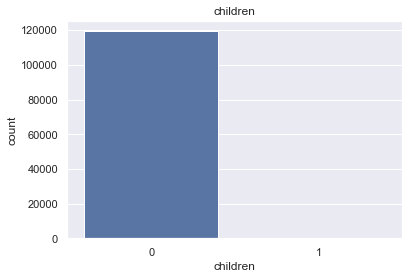

0    118902
1       488
Name: country, dtype: int64


C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


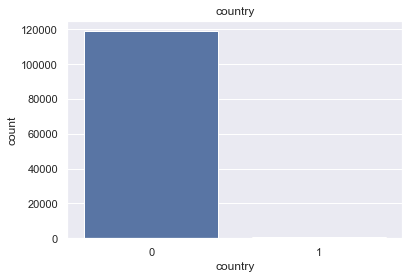

0    103050
1     16340
Name: agent, dtype: int64


C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


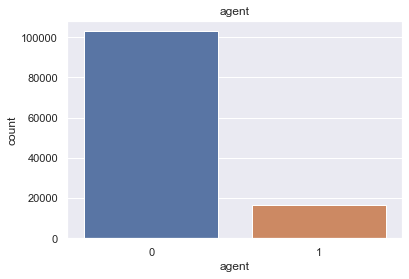

1    112593
0      6797
Name: company, dtype: int64


C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


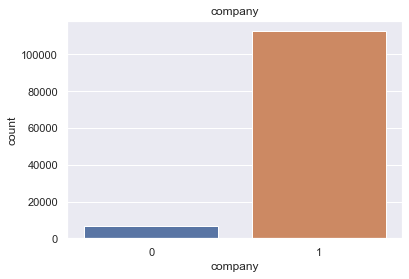

In [10]:
sns.set(style='darkgrid')
data = df.copy()
for feature in nan_features:
    data[feature] = np.where(data[feature].isnull(),1,0)
    print(data[feature].value_counts())
    plt.title(feature)
    sns.countplot(data[feature])
    plt.show()

In [11]:
## Here checking the percentage of missing values 
print(df.children.isnull().mean())
print(df.country.isnull().mean())
print(df.agent.isnull().mean())
print(df.company.isnull().mean())

3.350364352123293e-05
0.004087444509590418
0.13686238378423654
0.943068933746545


In [12]:
## As company columns consist of 94% nan values, so we will drop this column
## Also dropping unnecessar columns
df.drop(columns=['company', 'name', 'email', 'phone-number', 'credit_card', 'reservation_status_date'], inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out


### Categorical Featuers

In [13]:
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [14]:
for feature in cat_features:
    print(feature, len(df[feature].unique()))

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3


### Numerical Features

In [15]:
num_features = [feature for feature in df.columns if df[feature].dtypes!='O']
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [16]:
cont_num_features = [feature for feature in num_features if len(df[feature].unique())>25]
for feature in cont_num_features:
    print(feature, len(df[feature].unique()))

lead_time 479
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_week_nights 35
previous_bookings_not_canceled 73
agent 334
days_in_waiting_list 128
adr 8879


In [17]:
disc_num_feature = [feature for feature in num_features if len(df[feature].unique())<25]
for feature in disc_num_feature:
    print(feature, len(df[feature].unique()))

is_canceled 2
arrival_date_year 3
stays_in_weekend_nights 17
adults 14
children 6
babies 5
is_repeated_guest 2
previous_cancellations 15
booking_changes 21
required_car_parking_spaces 5
total_of_special_requests 6


In [18]:
df[cont_num_features].head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,agent,days_in_waiting_list,adr
0,342,27,1,0,0,NaN,0,0.0
1,737,27,1,0,0,NaN,0,0.0
2,7,27,1,1,0,NaN,0,75.0
3,13,27,1,1,0,304.0,0,75.0
4,14,27,1,2,0,240.0,0,98.0


In [19]:
df[disc_num_feature].head()

,is_canceled,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0,2015,0,2,0.0,0,0,0,3,0,0
1,0,2015,0,2,0.0,0,0,0,4,0,0
2,0,2015,0,1,0.0,0,0,0,0,0,0
3,0,2015,0,1,0.0,0,0,0,0,0,0
4,0,2015,0,2,0.0,0,0,0,0,0,1


C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


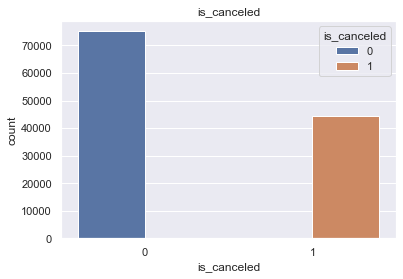

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


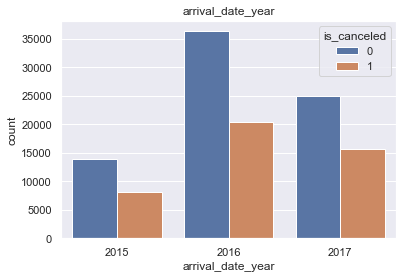

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


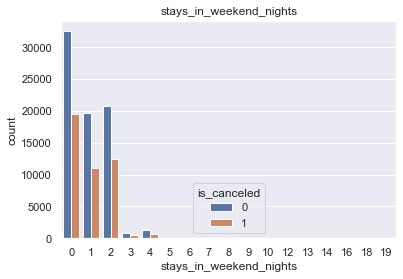

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


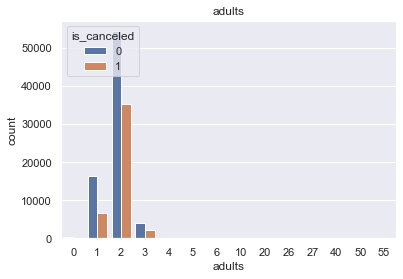

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


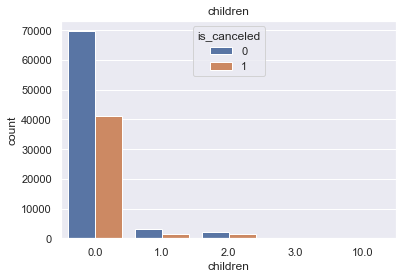

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


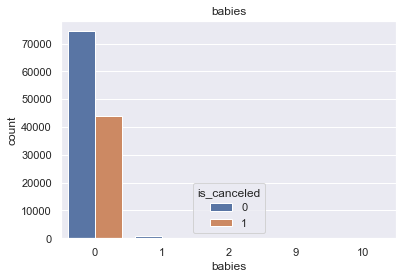

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


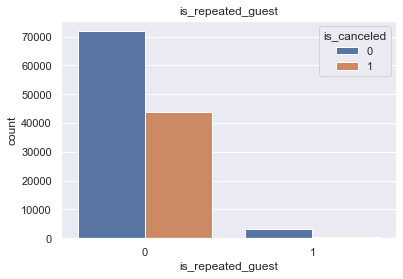

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


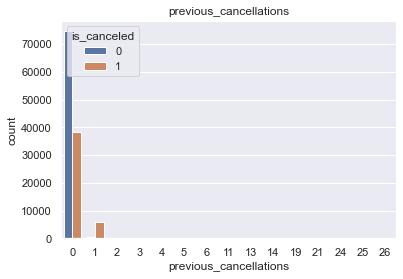

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


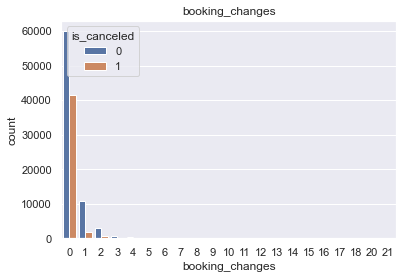

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


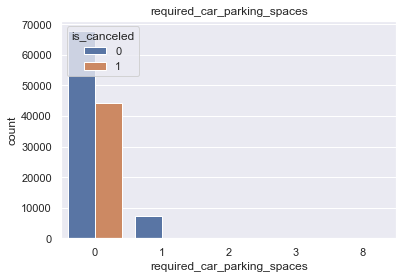

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


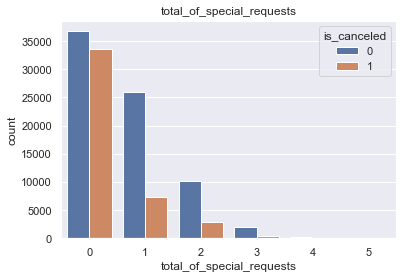

In [20]:
for feature in disc_num_feature:
    sns.countplot(df[feature], hue=df['is_canceled'])
    plt.title(feature)
    plt.show()

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


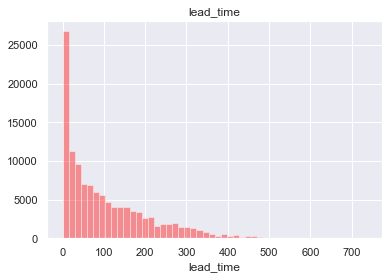

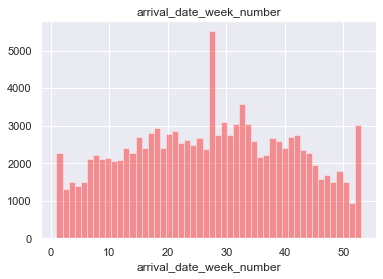

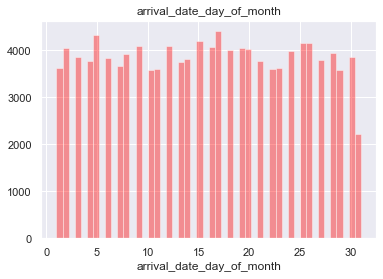

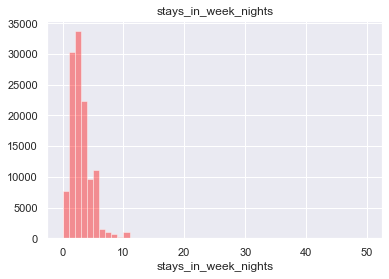

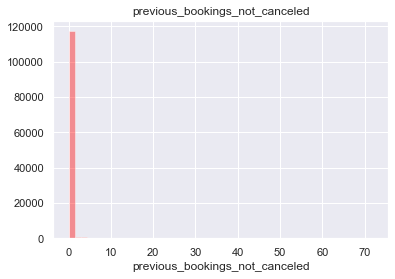

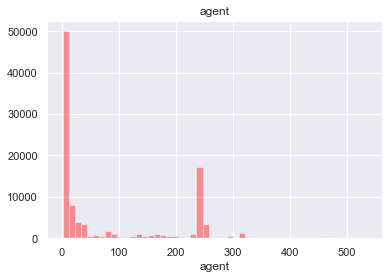

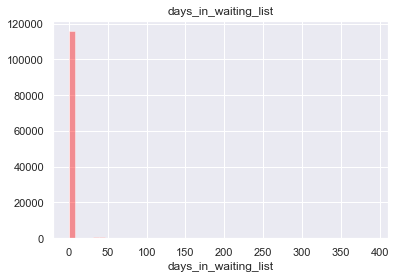

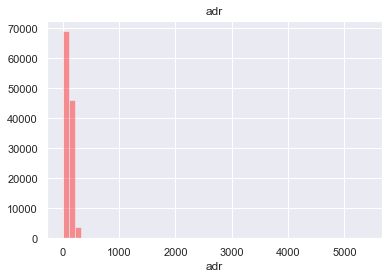

In [21]:
for feature in cont_num_features:
    sns.distplot(df[feature], kde=False, color='red')
    plt.title(feature)
    plt.show()

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


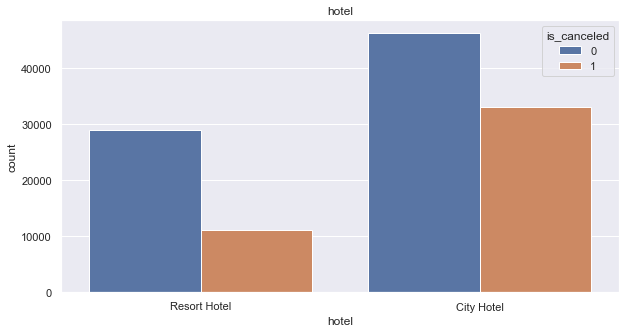

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


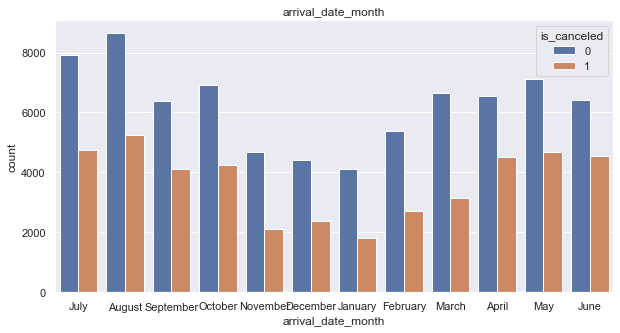

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


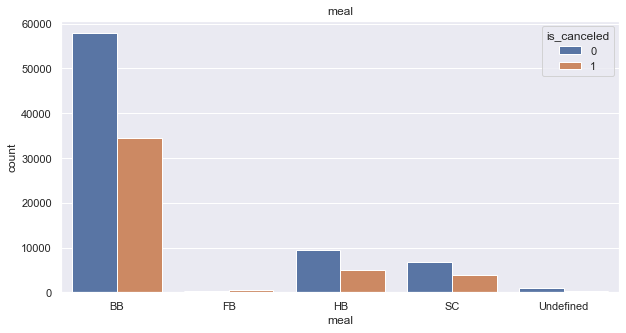

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


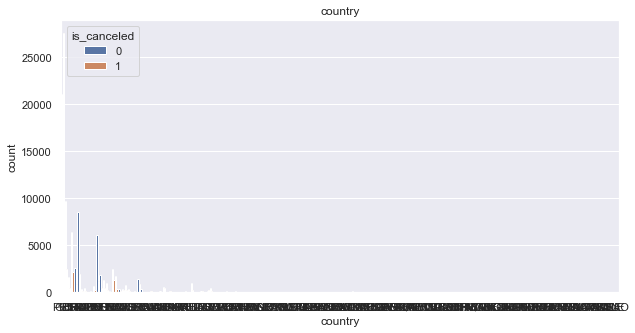

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


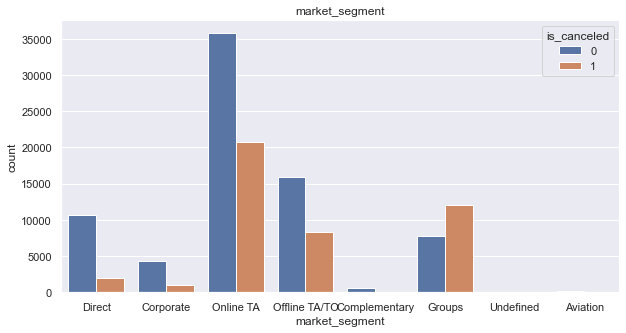

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


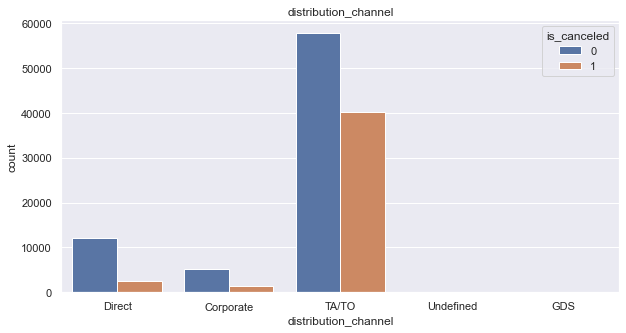

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


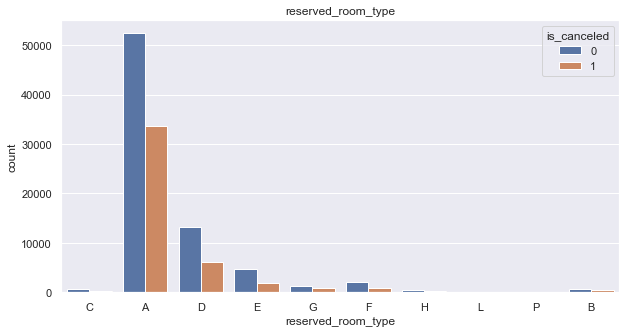

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


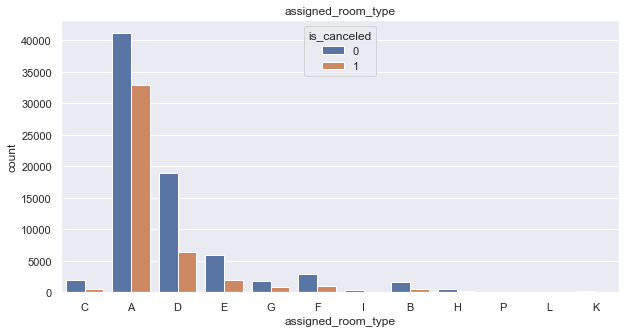

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


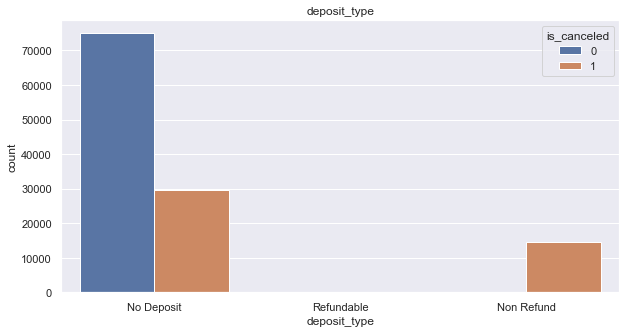

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


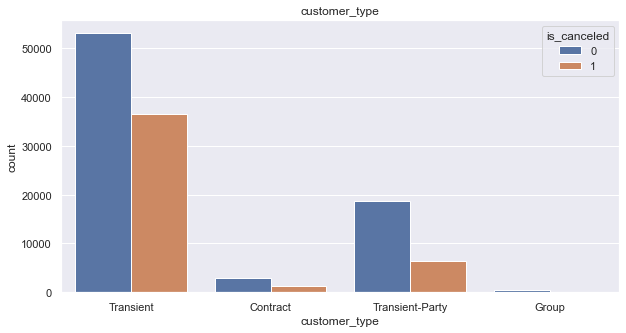

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


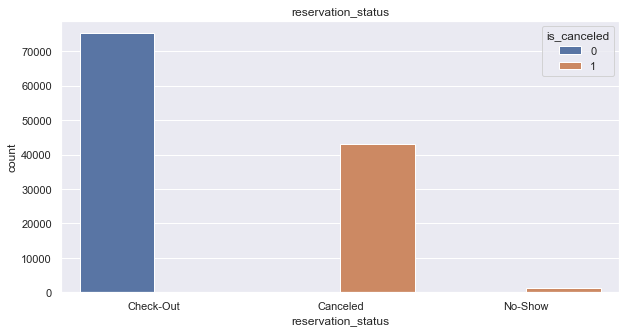

In [22]:
for feature in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(df[feature], hue=df['is_canceled'])
    plt.title(feature)
    plt.show()

### Outliers

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


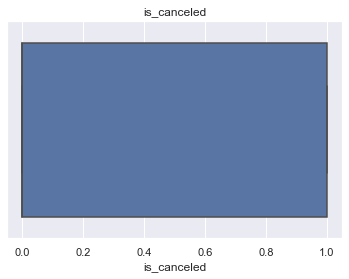

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


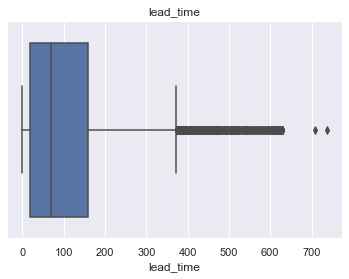

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


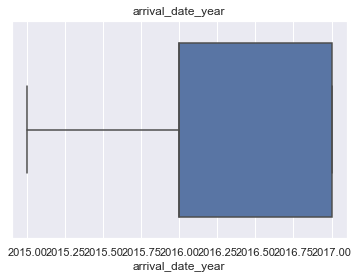

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


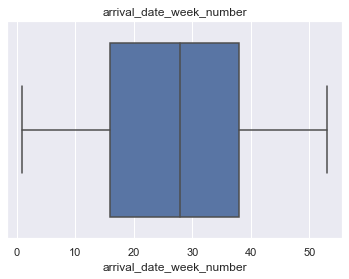

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


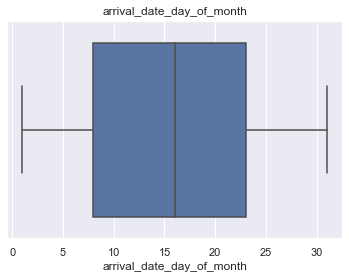

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


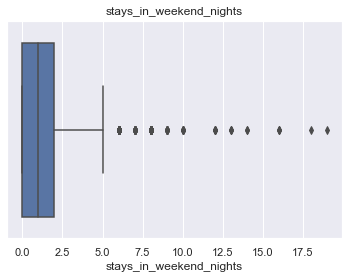

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


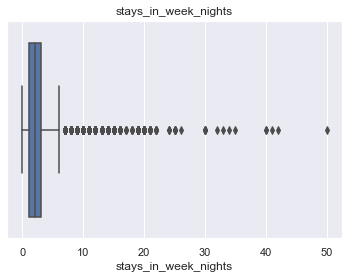

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


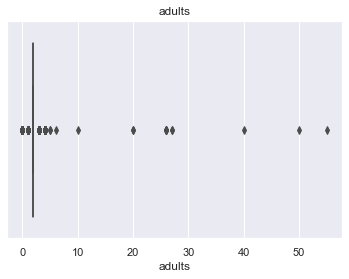

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


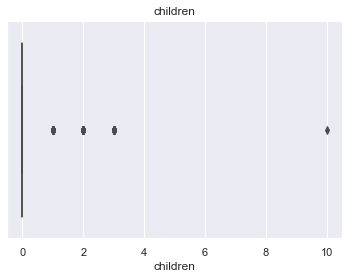

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


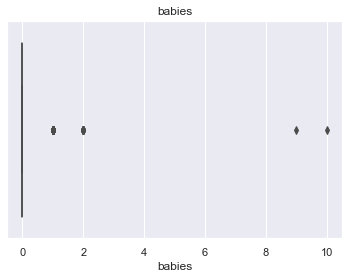

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


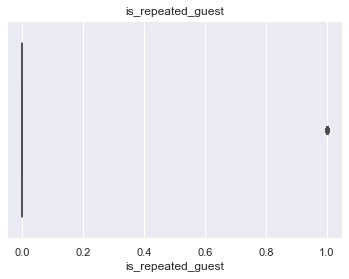

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


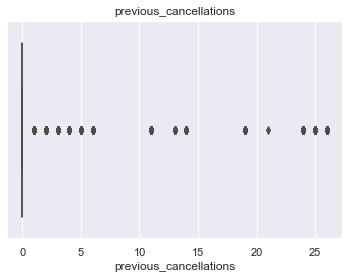

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


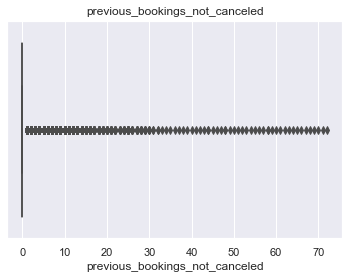

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


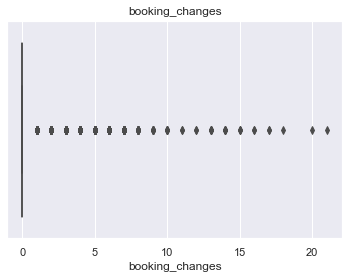

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


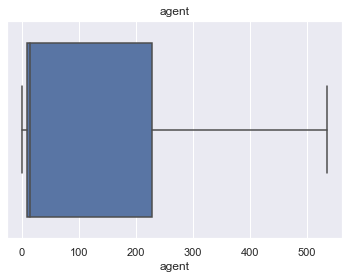

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


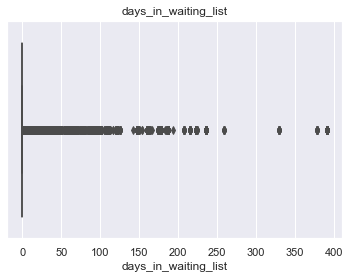

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


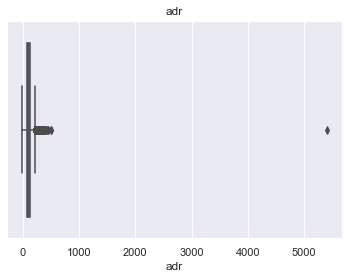

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


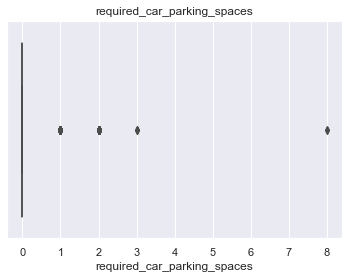

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


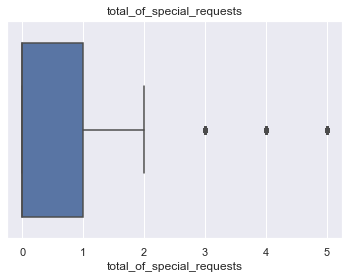

In [25]:
for feature in num_features:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

### Correlation

In [26]:
corr = df.corr()

<AxesSubplot:>

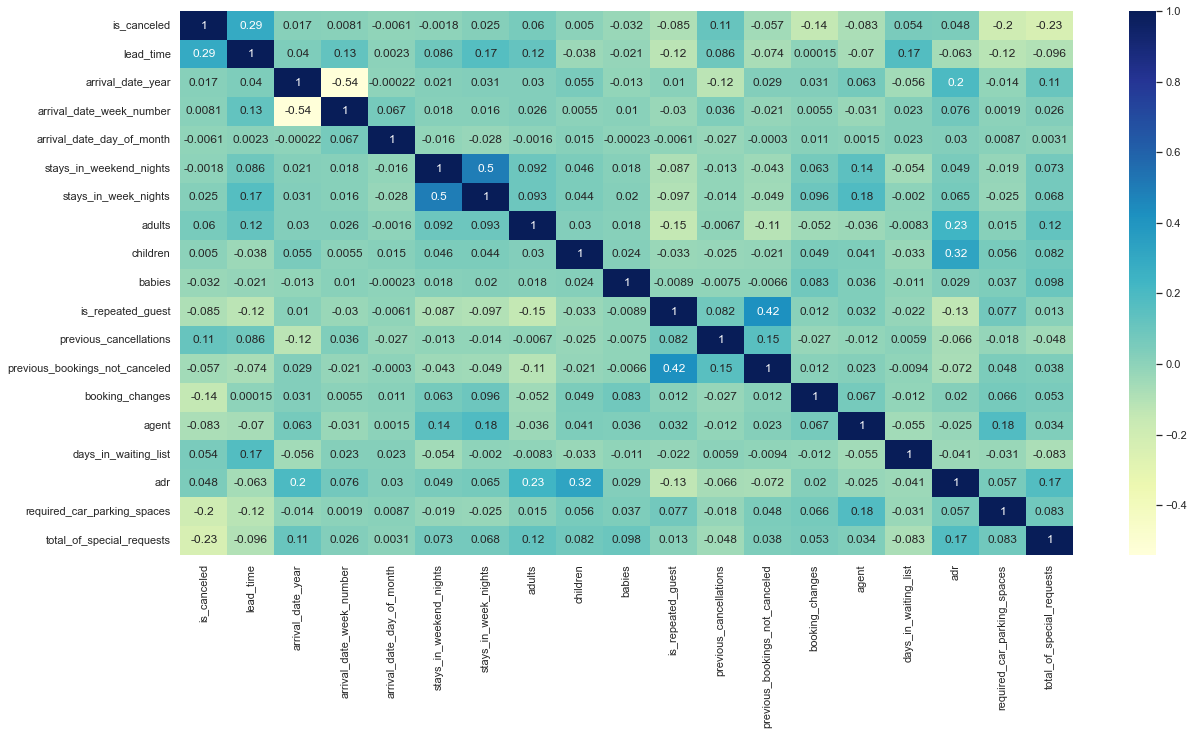

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

## Feature_Engineering

In [31]:
## Separating the dependent and independent variables
y = df['is_canceled']
x = df.drop(columns=['is_canceled'])

In [32]:
x.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [35]:
## Splitting the test train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(83573, 29)
(35817, 29)
(83573,)
(35817,)


### Handling missing values

In [48]:
nan_features = [feature for feature in x_train.columns if x_train[feature].isnull().sum()>=1]
nan_features

['children', 'agent']

In [41]:
## Replacing nan_values of country column
x_train['country'] = x_train['country'].replace(np.nan, 'Unknown')

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/252781224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['country'] = x_train['country'].replace(np.nan, 'Unknown')


In [49]:
x_train.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11417
days_in_waiting_list                  0
customer_type                         0


In [50]:
x_train.country[x_train['country']=='Unknown']

13811    Unknown
14369    Unknown
14094    Unknown
14192    Unknown
20756    Unknown
          ...   
14596    Unknown
14153    Unknown
13807    Unknown
14397    Unknown
13986    Unknown
Name: country, Length: 327, dtype: object

In [51]:
nan_feature = [feature for feature in x_train.columns if x_train[feature].isnull().sum()>=1]
nan_feature

['children', 'agent']

In [53]:
x_train['children'] = x_train['children'].replace(np.nan, x_train['children'].median())

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/163476814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['children'] = x_train['children'].replace(np.nan, x_train['children'].median())


In [54]:
nan_feature = [feature for feature in x_train.columns if x_train[feature].isnull().sum()>=1]
nan_feature

['agent']

In [55]:
x_train['agent'] = x_train['agent'].replace(np.nan, x_train['agent'].median())

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/2601220647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['agent'] = x_train['agent'].replace(np.nan, x_train['agent'].median())


In [56]:
nan_feature = [feature for feature in x_train.columns if x_train[feature].isnull().sum()>=1]
nan_feature

[]

## Handling Categorical Features

In [59]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [60]:
x_train[cat_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
9710,Resort Hotel,December,BB,FRA,Online TA,TA/TO,D,D,No Deposit,Transient,Canceled
40307,City Hotel,July,BB,PRT,Groups,TA/TO,A,A,No Deposit,Transient-Party,Canceled
110051,City Hotel,April,BB,BEL,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
22999,Resort Hotel,February,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
8344,Resort Hotel,September,BB,IRL,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
76820,City Hotel,July,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
110268,City Hotel,April,BB,AUT,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
103694,City Hotel,December,BB,ITA,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
860,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled


In [61]:
x_train[['arrival_date_month']]

,arrival_date_month
9710,December
40307,July
110051,April
22999,February
8344,September
...,...
76820,July
110268,April
103694,December
860,August


In [62]:
x_train['arrival_date_month'] = pd.to_datetime(x_train['arrival_date_month'], format='%B').dt.month

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/2841389365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['arrival_date_month'] = pd.to_datetime(x_train['arrival_date_month'], format='%B').dt.month


In [63]:
x_train[['arrival_date_month']]

,arrival_date_month
9710,12
40307,7
110051,4
22999,2
8344,9
...,...
76820,7
110268,4
103694,12
860,8


In [64]:
## Doing one Hot Encoding for Nominal Categorical Features
hotel = pd.get_dummies(x_train['hotel'])
meal = pd.get_dummies(x_train['meal'], drop_first=True)
market_segment = pd.get_dummies(x_train['market_segment'], drop_first=True)
distribution_channel = pd.get_dummies(x_train['distribution_channel'], drop_first=True)
deposit_type = pd.get_dummies(x_train['deposit_type'], drop_first=True)
customer_type = pd.get_dummies(x_train['customer_type'], drop_first=True)
print(hotel.shape, meal.shape, market_segment.shape, distribution_channel.shape, deposit_type.shape, customer_type.shape)

(83573, 2) (83573, 4) (83573, 7) (83573, 4) (83573, 2) (83573, 3)


In [65]:
OHE = pd.concat([hotel, meal, market_segment, distribution_channel, deposit_type, customer_type], axis=1)

In [66]:
OHE.shape

(83573, 22)

In [67]:
OHE.head()

,City Hotel,Resort Hotel,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
9710,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
40307,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
110051,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
22999,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8344,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [68]:
cat_features = [feature for feature in x_train.columns if x_train[feature].dtype=='O']
cat_features

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [69]:
## Dropping the unnecessary columns
x_train.drop(columns=['hotel',
             'meal',
             'market_segment',
             'distribution_channel',
             'reserved_room_type',
             'assigned_room_type',
             'deposit_type',
             'customer_type',
             'reservation_status'], inplace=True)

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
x_train.shape

(83573, 20)

In [71]:
x_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
9710,122,2016,12,53,27,0,4,2,0.0,0,FRA,0,0,0,3,240.0,0,74.75,0,2
40307,20,2015,7,30,22,0,2,2,0.0,0,PRT,0,0,0,0,1.0,0,62.00,0,0
110051,87,2017,4,16,16,2,3,3,0.0,0,BEL,0,0,0,0,9.0,0,171.00,0,0
22999,0,2017,2,5,2,0,1,1,0.0,0,PRT,1,0,1,0,196.0,0,43.00,0,1
8344,42,2016,9,39,23,0,1,2,0.0,0,IRL,0,0,0,0,240.0,0,109.00,0,1


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
lable = le.fit_transform(x_train['country'])
lable

array([ 54, 128,  14, ...,  78, 128, 128])

In [75]:
x_train['country'] = lable
x_train['country'].head()

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/3904290201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['country'] = lable


9710       54
40307     128
110051     14
22999     128
8344       73
Name: country, dtype: int32

In [76]:
# Checking any null features left
OHE.isnull().sum()

City Hotel         0
Resort Hotel       0
FB                 0
HB                 0
SC                 0
Undefined          0
Complementary      0
Corporate          0
Direct             0
Groups             0
Offline TA/TO      0
Online TA          0
Undefined          0
Direct             0
GDS                0
TA/TO              0
Undefined          0
Non Refund         0
Refundable         0
Group              0
Transient          0
Transient-Party    0
dtype: int64

In [77]:
OHE.head()

,City Hotel,Resort Hotel,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
9710,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
40307,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
110051,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
22999,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8344,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [78]:
OHE.shape

(83573, 22)

In [79]:
x_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
9710,122,2016,12,53,27,0,4,2,0.0,0,54,0,0,0,3,240.0,0,74.75,0,2
40307,20,2015,7,30,22,0,2,2,0.0,0,128,0,0,0,0,1.0,0,62.00,0,0
110051,87,2017,4,16,16,2,3,3,0.0,0,14,0,0,0,0,9.0,0,171.00,0,0
22999,0,2017,2,5,2,0,1,1,0.0,0,128,1,0,1,0,196.0,0,43.00,0,1
8344,42,2016,9,39,23,0,1,2,0.0,0,73,0,0,0,0,240.0,0,109.00,0,1


In [80]:
x_train.shape

(83573, 20)

In [81]:
## Again dropping the unnecessary columns
x_train.drop(columns=['children', 'babies'], inplace=True)

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
x_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
9710,122,2016,12,53,27,0,4,2,54,0,0,0,3,240.0,0,74.75,0,2
40307,20,2015,7,30,22,0,2,2,128,0,0,0,0,1.0,0,62.00,0,0
110051,87,2017,4,16,16,2,3,3,14,0,0,0,0,9.0,0,171.00,0,0
22999,0,2017,2,5,2,0,1,1,128,1,0,1,0,196.0,0,43.00,0,1
8344,42,2016,9,39,23,0,1,2,73,0,0,0,0,240.0,0,109.00,0,1


In [83]:
x_train.shape

(83573, 18)

In [84]:
## Now concatinate all the dataframes
X_train = pd.concat([x_train, OHE], axis=1)

In [85]:
X_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
9710,122,2016,12,53,27,0,4,2,54,0,...,0,0,0,1,0,0,0,0,1,0
40307,20,2015,7,30,22,0,2,2,128,0,...,0,0,0,1,0,0,0,0,0,1
110051,87,2017,4,16,16,2,3,3,14,0,...,0,0,0,1,0,0,0,0,1,0
22999,0,2017,2,5,2,0,1,1,128,1,...,0,0,0,1,0,0,0,0,1,0
8344,42,2016,9,39,23,0,1,2,73,0,...,0,0,0,1,0,0,0,0,1,0


In [86]:
X_train.shape

(83573, 40)

In [88]:
X_train.isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
City Hotel                        0
Resort Hotel                      0
FB                                0
HB                                0
SC                                0
Undefined                         0
Complementary                     0
Corporate                         0
Direct                            0
Groups                      

In [89]:
X_train.shape

(83573, 40)

In [90]:
y_train.shape

(83573,)

## Feature Engineering for test Dataset

##### Same Steps repeated as for training Dataset to prevent leakage in the Dataset.

In [91]:
x_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30946,Resort Hotel,203,2016,December,49,2,2,5,2,0.0,...,F,4,No Deposit,250.0,0,Transient,66.8,0,0,Check-Out
40207,City Hotel,82,2015,July,29,16,0,3,2,0.0,...,A,0,No Deposit,9.0,0,Transient,76.5,0,0,Canceled
103708,City Hotel,25,2016,December,53,27,0,3,3,0.0,...,K,2,No Deposit,220.0,0,Transient-Party,60.0,0,1,Check-Out
85144,City Hotel,1,2016,March,11,9,0,1,1,0.0,...,A,0,No Deposit,9.0,0,Transient-Party,95.0,0,0,Check-Out
109991,City Hotel,70,2017,April,16,16,2,2,2,0.0,...,A,0,No Deposit,9.0,0,Transient,108.0,0,0,Check-Out


In [93]:
nan_features = [feature for feature in x_test.columns if x_test[feature].isnull().sum()>=1]
nan_features

['country', 'agent']

In [94]:
x_test['country'] = x_test['country'].replace(np.nan, 'Unknown')

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/1788446595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['country'] = x_test['country'].replace(np.nan, 'Unknown')


In [95]:
x_test['agent'] = x_test['agent'].replace(np.nan, x_test['agent'].median())

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/2671402994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['agent'] = x_test['agent'].replace(np.nan, x_test['agent'].median())


In [96]:
nan_features = [feature for feature in x_test.columns if x_test[feature].isnull().sum()>=1]
nan_features

[]

In [97]:
x_test['arrival_date_month']

30946     December
40207         July
103708    December
85144        March
109991       April
            ...   
104051     January
13158       August
72432         July
111985         May
46463      January
Name: arrival_date_month, Length: 35817, dtype: object

In [98]:
x_test['arrival_date_month'] = pd.to_datetime(x_test['arrival_date_month'], format='%B').dt.month

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/3578079099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['arrival_date_month'] = pd.to_datetime(x_test['arrival_date_month'], format='%B').dt.month


In [99]:
x_test['arrival_date_month']

30946     12
40207      7
103708    12
85144      3
109991     4
          ..
104051     1
13158      8
72432      7
111985     5
46463      1
Name: arrival_date_month, Length: 35817, dtype: int64

In [100]:
cat_features = [feature for feature in x_test.columns if x_test[feature].dtypes=='O']
cat_features

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [101]:
## Doing one Hot Encoding for Nominal Categorical Features
t_hotel = pd.get_dummies(x_test['hotel'])
t_meal = pd.get_dummies(x_test['meal'], drop_first=True)
t_market_segment = pd.get_dummies(x_test['market_segment'], drop_first=True)
t_distribution_channel = pd.get_dummies(x_test['distribution_channel'], drop_first=True)
t_deposit_type = pd.get_dummies(x_test['deposit_type'], drop_first=True)
t_customer_type = pd.get_dummies(x_test['customer_type'], drop_first=True)
print(t_hotel.shape, t_meal.shape, t_market_segment.shape, t_distribution_channel.shape, t_deposit_type.shape, t_customer_type.shape)

(35817, 2) (35817, 4) (35817, 6) (35817, 4) (35817, 2) (35817, 3)


In [103]:
market_segment.head()

,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
9710,0,0,0,0,0,1,0
40307,0,0,0,1,0,0,0
110051,0,0,0,0,0,1,0
22999,0,0,0,0,0,1,0
8344,0,0,0,0,0,1,0


In [104]:
t_market_segment.head()

,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
30946,0,0,1,0,0,0
40207,0,0,0,0,0,1
103708,0,0,0,0,1,0
85144,0,0,0,0,0,1
109991,0,0,0,0,0,1


In [105]:
t_market_segment['Undefined'] = np.zeros_like(len(t_market_segment))

In [106]:
t_market_segment.isnull().sum()

Complementary    0
Corporate        0
Direct           0
Groups           0
Offline TA/TO    0
Online TA        0
Undefined        0
dtype: int64

In [107]:
t_OHE = pd.concat([t_hotel, t_meal, t_market_segment, t_distribution_channel, t_deposit_type, t_customer_type], axis=1)

In [108]:
t_OHE.head()

,City Hotel,Resort Hotel,FB,HB,SC,Undefined,Complementary,Corporate,Direct,Groups,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
30946,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
40207,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
103708,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
85144,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
109991,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [109]:
## Dropping the unnecessary columns
x_test.drop(columns=['hotel',
                    'meal',
                    'market_segment',
                    'distribution_channel',
                    'reserved_room_type',
                    'assigned_room_type',
                    'deposit_type',
                    'customer_type',
                    'reservation_status'], inplace=True)

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [110]:
x_test.shape

(35817, 20)

In [111]:
x_test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
30946,203,2016,12,49,2,2,5,2,0.0,0,GBR,0,0,0,4,250.0,0,66.8,0,0
40207,82,2015,7,29,16,0,3,2,0.0,0,PRT,0,0,0,0,9.0,0,76.5,0,0
103708,25,2016,12,53,27,0,3,3,0.0,0,BRA,0,0,0,2,220.0,0,60.0,0,1
85144,1,2016,3,11,9,0,1,1,0.0,0,SWE,0,0,0,0,9.0,0,95.0,0,0
109991,70,2017,4,16,16,2,2,2,0.0,0,GBR,0,0,0,0,9.0,0,108.0,0,0


In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [113]:
t_label = le.fit_transform(x_test['country'])

In [114]:
x_test['country'] = t_label

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_2652/3355526914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['country'] = t_label


In [115]:
x_test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
30946,203,2016,12,49,2,2,5,2,0.0,0,47,0,0,0,4,250.0,0,66.8,0,0
40207,82,2015,7,29,16,0,3,2,0.0,0,106,0,0,0,0,9.0,0,76.5,0,0
103708,25,2016,12,53,27,0,3,3,0.0,0,19,0,0,0,2,220.0,0,60.0,0,1
85144,1,2016,3,11,9,0,1,1,0.0,0,118,0,0,0,0,9.0,0,95.0,0,0
109991,70,2017,4,16,16,2,2,2,0.0,0,47,0,0,0,0,9.0,0,108.0,0,0


In [116]:
x_test.shape

(35817, 20)

In [117]:
## Dropping more unnecessary columns
x_test.drop(columns=['children', 'babies'], inplace=True)

C:\Users\Muhammad Hamza Abid\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [118]:
x_test.shape

(35817, 18)

In [119]:
X_test = pd.concat([x_test, t_OHE], axis=1)

In [120]:
X_test.shape

(35817, 40)

In [121]:
X_test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,country,is_repeated_guest,...,Undefined,Direct,GDS,TA/TO,Undefined,Non Refund,Refundable,Group,Transient,Transient-Party
30946,203,2016,12,49,2,2,5,2,47,0,...,0,1,0,0,0,0,0,0,1,0
40207,82,2015,7,29,16,0,3,2,106,0,...,0,0,0,1,0,0,0,0,1,0
103708,25,2016,12,53,27,0,3,3,19,0,...,0,0,0,1,0,0,0,0,0,1
85144,1,2016,3,11,9,0,1,1,118,0,...,0,0,0,1,0,0,0,0,0,1
109991,70,2017,4,16,16,2,2,2,47,0,...,0,0,0,1,0,0,0,0,1,0


In [124]:
X_test.isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
country                           0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
City Hotel                        0
Resort Hotel                      0
FB                                0
HB                                0
SC                                0
Undefined                         0
Complementary                     0
Corporate                         0
Direct                            0
Groups                      

# Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
StandardScalarX = StandardScaler()
X_train = StandardScalarX.fit_transform(X_train)
X_test = StandardScalarX.fit_transform(X_test)

# Model Building 

In [126]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [128]:
## Random Forest Model Building

model_rf = RandomForestClassifier(min_samples_leaf=6, min_samples_split=6,
                                 n_estimators=100)

## Fit the model
estimator = model_rf.fit(X_train, y_train)
## Predict Model
predict_rf = model_rf.predict(X_test)

In [129]:
from sklearn.metrics import classification_report

In [130]:
print('RF', classification_report(y_test, predict_rf))

RF               precision    recall  f1-score   support

           0       0.87      0.94      0.91     22478
           1       0.89      0.76      0.82     13339

    accuracy                           0.88     35817
   macro avg       0.88      0.85      0.86     35817
weighted avg       0.88      0.88      0.87     35817



In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
cm = confusion_matrix(y_test, predict_rf)

In [133]:
cm

array([[21221,  1257],
       [ 3156, 10183]], dtype=int64)

<AxesSubplot:>

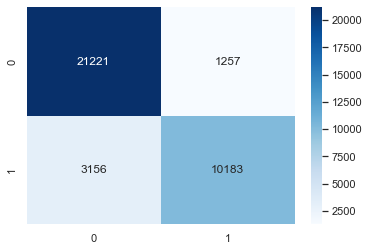

In [135]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')